In [38]:
import json
i = 2
monpremierex = json.load(open(f"/Data/etienne.marecaux/EA/OptimisationConsomationEDF/tcl/input/tcl{i}/tcl{i}.json", "r"))
monpremierex_output = json.load(open(f"/Data/etienne.marecaux/EA/OptimisationConsomationEDF/tcl/output/tcl{i}/tcl{i}.json", "r"))

In [39]:
print(monpremierex)

{'name': 'tcl2', 'input_path': 'tcl/input/tcl2', 'output_path': 'tcl/output/tcl2', 'working_dir': 'tcl/input/tcl2', 'initial_temperature': 17.114879331198324, 'coefDeltaTemp': 0.05625, 'coefConso': 1, 'puissanceMin': 0, 'puissanceMax': 4, 'temperature_max': 20.488542265995683, 'temperature_min': 15.952618800571742, 'chroniqueTempExt': [14.826807518479729, 11.82015936300175, 13.775962442737745, 12.197129549992093, 12.319665723454115, 13.224343048704156, 12.841404529675229, 12.422644249704454, 11.095503318369339, 13.404132297557526, 14.922148679642294, 12.99806024303763, 13.310444860193234, 13.878112665975399, 14.278158389641202, 14.012945991890009, 16.096811028117575, 16.31995763780429, 17.249786363098185, 16.560838422462528, 15.59747801063207, 18.812571428981595, 18.987467874902066, 17.081086907716745, 19.959742339240844, 18.600230478833506, 18.490353549809605, 18.76836863006199, 19.004625693976152, 18.864654420910764, 17.12764413785542, 19.254135951151255, 18.719875261141823, 18.12070

In [40]:
temperature_max = monpremierex["temperature_max"]
temperature_min = monpremierex["temperature_min"]
coefDeltaTemp = monpremierex["coefDeltaTemp"]
electricity_cost = monpremierex["electricity_cost"]
coefConso = monpremierex["coefConso"]
initial_temperature = monpremierex["initial_temperature"]
chroniqueTempExt = monpremierex["chroniqueTempExt"]
puissanceMin = monpremierex["puissanceMin"]
puissanceMax = monpremierex["puissanceMax"]
load = monpremierex_output["load"]

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
T = 48
temp_profile = np.zeros(T)
temp_profile[0] = initial_temperature
for t in range(1,T):
    temp_profile[t] = temp_profile[t - 1] + load[t] * coefConso*0.5 + 0.5*coefDeltaTemp*(chroniqueTempExt[t-1]-temp_profile[t-1])

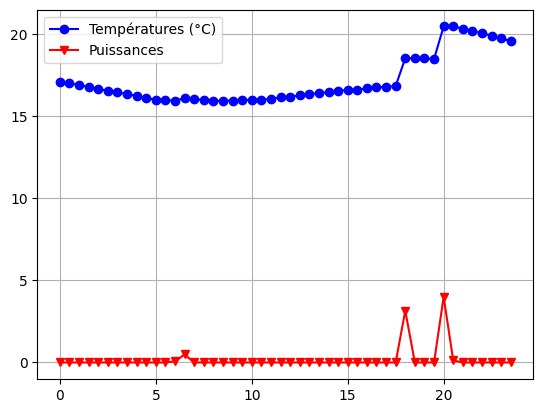

In [43]:
temps = [k/2 for k in range(48)]
plt.plot(temps, temp_profile, label='Températures (°C)', color='blue', marker='o')
plt.plot(temps, load, label='Puissances', color='red', marker='v')
plt.legend()
plt.grid(True)
plt.show()